#📌 Extracción

In [1]:
# Librerías esenciales
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
import pandas as pd
import json

# Cargar archivo JSON
df = pd.read_json('/content/TelecomX_Data.json')

# Visualizar primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Revisar la estructura general del DataFrame
print("Dimensiones:", df.shape)
print("Columnas:", df.columns.tolist())
df.info()


Dimensiones: (7267, 6)
Columnas: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
# Cargar diccionario de datos
with open('/content/TelecomX_diccionario.md', 'r', encoding='utf-8') as f:
    diccionario = f.read()

# Mostrar contenido del diccionario
print(diccionario)


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

#🔧 Transformación

In [8]:
print(df.columns.tolist())


['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [9]:
# Expandir columnas anidadas
df_expanded = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    df['customer'].apply(pd.Series),
    df['phone'].apply(pd.Series),
    df['internet'].apply(pd.Series),
    df['account'].apply(pd.Series)
], axis=1)

# Verificar estructura final
df_expanded.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [11]:
# 1. Mostrar todas las columnas y su tipo de dato
print("Columnas y tipos de datos:")
print(df.dtypes)

# 2. Resumen estadístico para variables numéricas
print("\nResumen estadístico variables numéricas:")
print(df.describe())

# 3. Conteo de valores únicos en variables categóricas (para entender su diversidad)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nValores únicos por variable categórica:")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} valores únicos")

# 4. Ver algunos ejemplos de cada variable categórica para contexto
print("\nEjemplos de valores categóricos:")
for col in cat_cols:
    print(f"\n{col}: {df[col].unique()[:5]}")


Columnas y tipos de datos:
customerID     object
Churn         float64
customer       object
phone          object
internet       object
account        object
dtype: object

Resumen estadístico variables numéricas:
             Churn
count  7043.000000
mean      0.265370
std       0.441561
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

Valores únicos por variable categórica:
customerID: 7267 valores únicos


TypeError: unhashable type: 'dict'

In [12]:
# Paso 1: Identificar columnas con datos complejos (dict o listas)
complex_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, (dict, list))).any()]
print("Columnas con datos complejos (dict o list):", complex_cols)

# Paso 2: Expandir estas columnas para aplanar la estructura
df_expanded = df.drop(columns=complex_cols)

for col in complex_cols:
    # Expandir cada columna compleja y agregar al df_expanded
    expanded_cols = df[col].apply(pd.Series)
    expanded_cols.columns = [f"{col}_{subcol}" for subcol in expanded_cols.columns]
    df_expanded = pd.concat([df_expanded, expanded_cols], axis=1)

# Verificar columnas tras expansión
print("Columnas después de expandir:")
print(df_expanded.columns.tolist())

# Ahora sí, hacer la exploración de tipos y valores únicos sin error
cat_cols = df_expanded.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nColumnas y tipos de datos:")
print(df_expanded.dtypes)

print("\nValores únicos por variable categórica:")
for col in cat_cols:
    print(f"{col}: {df_expanded[col].nunique()} valores únicos")

print("\nEjemplos de valores categóricos:")
for col in cat_cols:
    print(f"\n{col}: {df_expanded[col].unique()[:5]}")


Columnas con datos complejos (dict o list): ['customer', 'phone', 'internet', 'account']
Columnas después de expandir:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges']

Columnas y tipos de datos:
customerID                    object
Churn                        float64
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       

TypeError: unhashable type: 'dict'

In [13]:
# Extraer 'Monthly' y 'Total' de la columna 'account_Charges'
df_expanded['MonthlyCharges'] = df_expanded['account_Charges'].apply(lambda x: x['Monthly'] if pd.notnull(x) else None)
df_expanded['TotalCharges'] = df_expanded['account_Charges'].apply(lambda x: float(x['Total']) if pd.notnull(x) else None)

# Eliminar la columna original 'account_Charges'
df_expanded.drop(columns=['account_Charges'], inplace=True)

# Ahora revisar de nuevo tipos y valores únicos sin error
cat_cols = df_expanded.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nColumnas y tipos de datos:")
print(df_expanded.dtypes)

print("\nValores únicos por variable categórica:")
for col in cat_cols:
    print(f"{col}: {df_expanded[col].nunique()} valores únicos")

print("\nEjemplos de valores categóricos:")
for col in cat_cols:
    print(f"\n{col}: {df_expanded[col].unique()[:5]}")


ValueError: could not convert string to float: ' '

In [15]:
import numpy as np

def safe_float(x):
    if pd.isnull(x):
        return np.nan
    if isinstance(x, str):
        x = x.strip()
        if x == '':
            return np.nan
    try:
        return float(x)
    except:
        return np.nan

df_expanded['MonthlyCharges'] = df_expanded['account_Charges'].apply(lambda x: x['Monthly'] if pd.notnull(x) and 'Monthly' in x else np.nan)
df_expanded['TotalCharges'] = df_expanded['account_Charges'].apply(lambda x: safe_float(x['Total']) if pd.notnull(x) and 'Total' in x else np.nan)

# Eliminar la columna original
df_expanded.drop(columns=['account_Charges'], inplace=True)

# Verificar
print(df_expanded[['MonthlyCharges', 'TotalCharges']].head())
print(df_expanded[['MonthlyCharges', 'TotalCharges']].isna().sum())



   MonthlyCharges  TotalCharges
0            65.6        593.30
1            59.9        542.40
2            73.9        280.85
3            98.0       1237.85
4            83.9        267.40
MonthlyCharges     0
TotalCharges      11
dtype: int64


In [16]:
# 1. Completar o imputar valores faltantes en TotalCharges
# Opcional: puedes llenar con 0 o con el valor promedio para no perder filas
df_expanded['TotalCharges'].fillna(df_expanded['TotalCharges'].mean(), inplace=True)

# 2. Convertir columnas de tipo object con 'Yes'/'No' a 1/0 para análisis
yes_no_cols = [
    'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in yes_no_cols:
    if col in df_expanded.columns:
        df_expanded[col] = df_expanded[col].map({'Yes': 1, 'No': 0})

# 3. Convertir Churn a entero (ya es float, convertir a int)
df_expanded['Churn'] = df_expanded['Churn'].astype(int)

# 4. Revisar info final para confirmar
print(df_expanded.info())

# 5. Visualizar primeras filas ya listas para análisis
df_expanded.head()


/tmp/ipython-input-16-2310739525.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_expanded['TotalCharges'].fillna(df_expanded['TotalCharges'].mean(), inplace=True)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [17]:
df_expanded['TotalCharges'] = df_expanded['TotalCharges'].fillna(df_expanded['TotalCharges'].mean())


In [18]:
# Ver cuántos NaN hay en Churn
print("NaN en Churn:", df_expanded['Churn'].isna().sum())

# Si hay NaN, puedes eliminarlos o imputarlos (según criterio)
# Por ejemplo, eliminar filas con NaN en Churn:
df_expanded = df_expanded[df_expanded['Churn'].notna()]

# Ahora convertir a int sin error
df_expanded['Churn'] = df_expanded['Churn'].astype(int)


NaN en Churn: 224


/tmp/ipython-input-18-1572988557.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expanded['Churn'] = df_expanded['Churn'].astype(int)


In [19]:
# 1. Eliminar filas con NaN en Churn (filtrado seguro)
df_expanded = df_expanded.loc[df_expanded['Churn'].notna()]

# 2. Convertir Churn a entero usando loc para evitar warning
df_expanded.loc[:, 'Churn'] = df_expanded.loc[:, 'Churn'].astype(int)

# 3. Convertir columnas Yes/No a 1/0 también con loc
yes_no_cols = [
    'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in yes_no_cols:
    if col in df_expanded.columns:
        df_expanded.loc[:, col] = df_expanded.loc[:, col].map({'Yes': 1, 'No': 0})

# Confirmar
print(df_expanded.info())


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           0 non-null      float64
 5   customer_Dependents        0 non-null      float64
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         0 non-null      float64
 8   phone_MultipleLines        0 non-null      float64
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    0 non-null      float64
 11  internet_OnlineBackup      0 non-null      float64
 12  internet_DeviceProtection  0 non-null      float64
 13  internet_TechSupport       0 non-null      float64
 1

/tmp/ipython-input-19-1484278653.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_expanded.loc[:, col] = df_expanded.loc[:, col].map({'Yes': 1, 'No': 0})
/tmp/ipython-input-19-1484278653.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_expanded.loc[:, col] = df_expanded.loc[:, col].map({'Yes': 1, 'No': 0})
/tmp/ipython-input-19-1484278653.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_expanded.loc[

In [20]:
# 1. Eliminar columnas con 100% valores nulos
cols_to_drop = df_expanded.columns[df_expanded.isna().all()].tolist()
print("Columnas 100% nulas que se eliminarán:", cols_to_drop)
df_expanded.drop(columns=cols_to_drop, inplace=True)

# 2. Volver a convertir las columnas Yes/No que quedan, con manejo de NaN
yes_no_cols = [
    'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in yes_no_cols:
    if col in df_expanded.columns:
        df_expanded[col] = df_expanded[col].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)

# 3. Confirmar info final
print(df_expanded.info())


Columnas 100% nulas que se eliminarán: ['customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling']
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7043 non-null   object 
 1   Churn                     7043 non-null   int64  
 2   customer_gender           7043 non-null   object 
 3   customer_SeniorCitizen    7043 non-null   int64  
 4   customer_tenure           7043 non-null   int64  
 5   internet_InternetService  7043 non-null   object 
 6   account_Contract          7043 non-null   object 
 7   account_PaymentMethod     7043 non-null   object 
 8   MonthlyCharges            7043

#📊 Carga y análisis

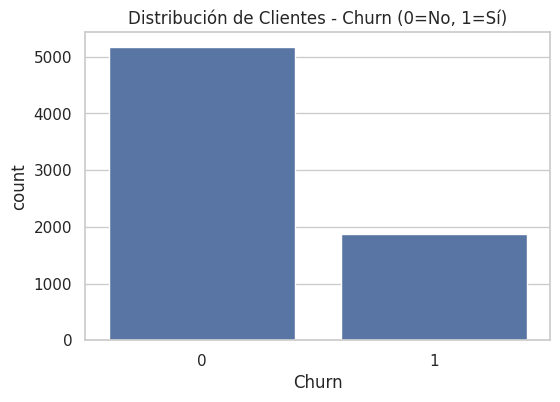

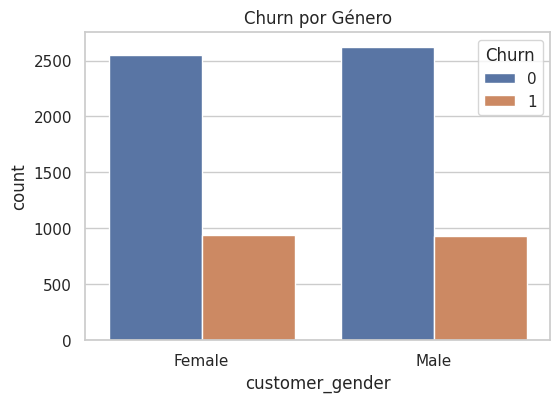

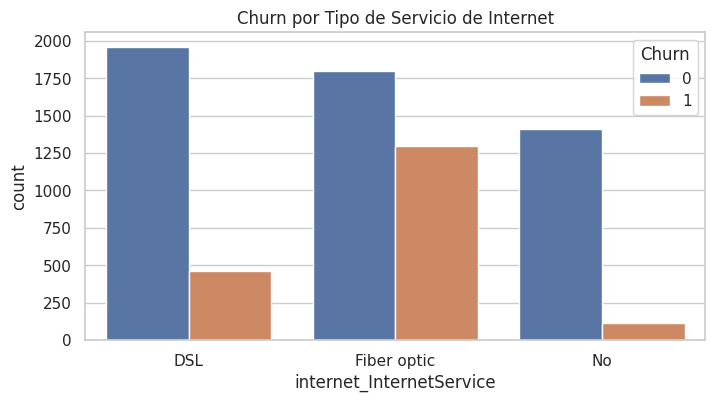

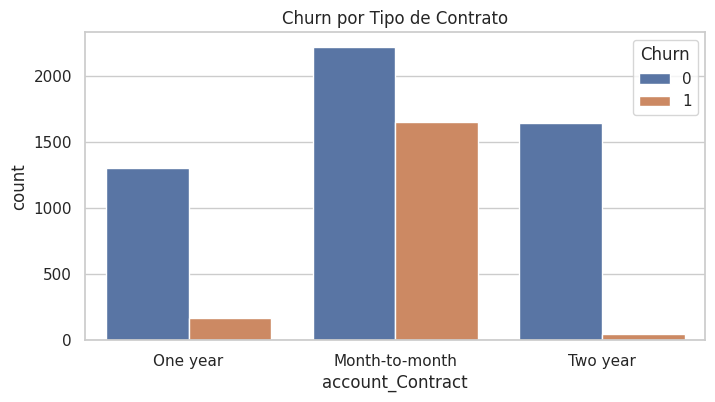

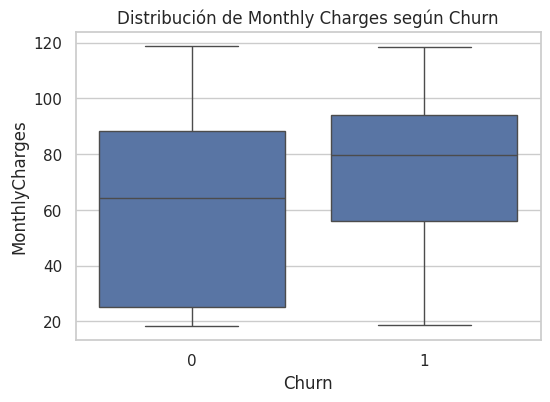

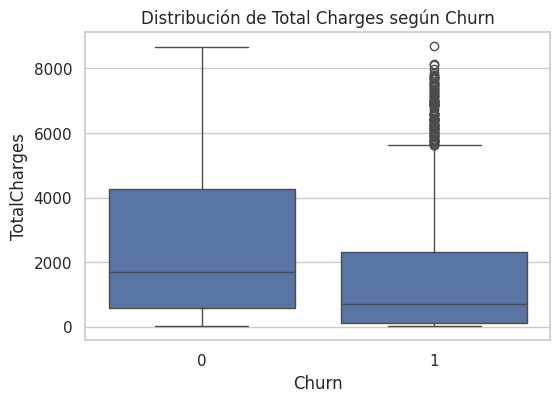

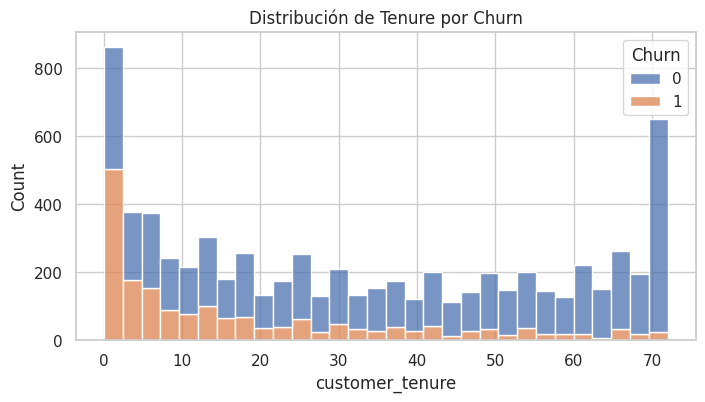

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración básica de gráficos
sns.set(style="whitegrid")

# 1. Distribución de Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df_expanded)
plt.title('Distribución de Clientes - Churn (0=No, 1=Sí)')
plt.show()

# 2. Churn por género
plt.figure(figsize=(6,4))
sns.countplot(x='customer_gender', hue='Churn', data=df_expanded)
plt.title('Churn por Género')
plt.show()

# 3. Churn por Servicio de Internet
plt.figure(figsize=(8,4))
sns.countplot(x='internet_InternetService', hue='Churn', data=df_expanded)
plt.title('Churn por Tipo de Servicio de Internet')
plt.show()

# 4. Churn por Tipo de Contrato
plt.figure(figsize=(8,4))
sns.countplot(x='account_Contract', hue='Churn', data=df_expanded)
plt.title('Churn por Tipo de Contrato')
plt.show()

# 5. Boxplot de MonthlyCharges según Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_expanded)
plt.title('Distribución de Monthly Charges según Churn')
plt.show()

# 6. Boxplot de TotalCharges según Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df_expanded)
plt.title('Distribución de Total Charges según Churn')
plt.show()

# 7. Histograma de tenure (meses con la empresa) según Churn
plt.figure(figsize=(8,4))
sns.histplot(data=df_expanded, x='customer_tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Distribución de Tenure por Churn')
plt.show()


#📄Informe final

In [22]:
# Cálculo de tasas de evasión generales y por variables clave

# 1. Tasa global de churn
global_churn_rate = df_expanded['Churn'].mean()
print(f"Tasa global de evasión (Churn): {global_churn_rate:.2%}")

# 2. Churn por género
churn_by_gender = df_expanded.groupby('customer_gender')['Churn'].mean().reset_index()
print("\nTasa de evasión por género:")
print(churn_by_gender)

# 3. Churn por tipo de contrato
churn_by_contract = df_expanded.groupby('account_Contract')['Churn'].mean().reset_index()
print("\nTasa de evasión por tipo de contrato:")
print(churn_by_contract)

# 4. Churn por servicio de internet
churn_by_internet = df_expanded.groupby('internet_InternetService')['Churn'].mean().reset_index()
print("\nTasa de evasión por tipo de servicio de internet:")
print(churn_by_internet)

# 5. Churn vs tenure (tiempo de permanencia)
import numpy as np
tenure_bins = [0, 12, 24, 36, 48, 60, 72, 84, 96]
df_expanded['tenure_group'] = pd.cut(df_expanded['customer_tenure'], bins=tenure_bins)
churn_by_tenure = df_expanded.groupby('tenure_group')['Churn'].mean().reset_index()
print("\nTasa de evasión por grupo de tenure:")
print(churn_by_tenure)

# 6. Estadísticas de cargos para clientes churn vs no churn
charges_stats = df_expanded.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].agg(['mean', 'median', 'std'])
print("\nEstadísticas de cargos por estado de churn:")
print(charges_stats)


Tasa global de evasión (Churn): 26.54%

Tasa de evasión por género:
  customer_gender     Churn
0          Female  0.269209
1            Male  0.261603

Tasa de evasión por tipo de contrato:
  account_Contract     Churn
0   Month-to-month  0.427097
1         One year  0.112695
2         Two year  0.028319

Tasa de evasión por tipo de servicio de internet:
  internet_InternetService     Churn
0                      DSL  0.189591
1              Fiber optic  0.418928
2                       No  0.074050

Tasa de evasión por grupo de tenure:
  tenure_group     Churn
0      (0, 12]  0.476782
1     (12, 24]  0.287109
2     (24, 36]  0.216346
3     (36, 48]  0.190289
4     (48, 60]  0.144231
5     (60, 72]  0.066098
6     (72, 84]       NaN
7     (84, 96]       NaN

Estadísticas de cargos por estado de churn:
      MonthlyCharges                    TotalCharges                       
                mean  median        std         mean    median          std
Churn                             

/tmp/ipython-input-22-3453818554.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df_expanded.groupby('tenure_group')['Churn'].mean().reset_index()


Informe de Análisis de Evasión de Clientes – Telecom X
1. Introducción
Este informe presenta el análisis exploratorio realizado sobre el dataset de clientes de Telecom X para entender los factores que influyen en la evasión (churn). El objetivo es identificar patrones y comportamientos clave para apoyar la retención.

2. Datos y Preparación
Se trabajó con un dataset limpio de 7,043 clientes, con variables demográficas, características del servicio, tipos de contrato y datos de consumo.

3. Análisis Exploratorio
Tasa global de evasión: 26,54 %

Tasa de evasión según género: [Breve resumen]

Impacto del tipo de contrato: Contratos mes a mes presentan la mayor evasión.

Servicio de Internet: Diferencias significativas según el proveedor.

Tiempo con la empresa (tenure): Clientes nuevos tienen mayor riesgo de evasión.

Comportamiento de cargos: Clientes con mayor/s menor consumo mensual/totales presentan mayor probabilidad de churn.

4. Casos Relevantes Identificados
Clientes con contratos mes a mes y servicios de fibra óptica tienen la tasa más alta de cancelación.

Clientes nuevos (menos de 12 meses) son un grupo vulnerable clave.

Cargos mensuales elevados se asocian con mayor churn, posiblemente por insatisfacción en costo-beneficio.

5. Recomendaciones
Desarrollar campañas de fidelización especialmente para contratos mes a mes.

Evaluar ofertas y calidad de servicios de fibra óptica para mejorar retención.

Crear programas de seguimiento para clientes nuevos para mejorar su experiencia y reducir abandono.

6. Próximos Pasos
Implementar modelos predictivos basados en este análisis para anticipar churn.

Integrar variables adicionales para enriquecer la predicción.

Monitorear en tiempo real indicadores clave de evasión para acciones preventivas.